<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/PytorchTutorial3_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[莫凡Pytorch教程（三）：Pytorch分类模型搭建](https://juejin.cn/post/7089937834659807262)

In [70]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)            # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)                     # class0 y data (tensor), shape=(100)
x1 = torch.normal(-2*n_data, 1)           # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                      # class1 y data (tensor), shape=(100)
x = torch.cat((x0, x1), 0).float()        # FloatTensor
y = torch.cat((y0, y1), 0).long()         # LongTensor

print(x0.shape)
print(y0.shape)
print(x.shape)
print(y.shape)

torch.Size([100, 2])
torch.Size([100])
torch.Size([200, 2])
torch.Size([200])


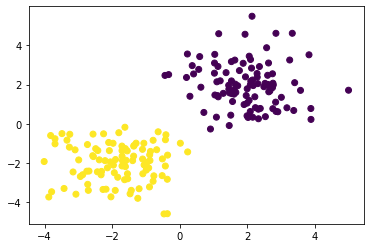

In [40]:
# Scatter with matplotlib
#plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy())
plt.scatter(x[:,0], x[:, 1], c=y)
#plt.savefig("./img/03_data.png")
plt.show()

# Scatter with Plotly
fig = go.Figure([
    go.Scatter(x=x0[:,0], y=x0[:,1], mode='markers', name='class 0'),
    go.Scatter(x=x1[:,0], y=x1[:,1], mode='markers', name='class 1'),
])
fig.update_layout(width=500, height=400, margin=dict(l=20, r=20, t=20, b=20))
fig.show()

fig = px.scatter(x=x[:,0], y=x[:,1], 
                 color=y.numpy().astype(str), labels={'color':'class'})
fig.update_layout(width=500, height=400, margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        # 分别表示feature个数、隐藏层神经元数个数、输出值数目
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # x 是输入数据
        x = F.relu(self.hidden(x))   # x -> (n_sample, n_hidden)
        x = self.predict(x)          # x -> (n_sample, n_output)
        y = F.softmax(x, dim=1)      # y -> (n_sample, n_probability(=n_output)))
        return y

In [112]:
net = Net(2, 10, 2)  # 输入为整个Batch的训练数据，每条数据为2个特征，xy坐标，输出为一个长度为200*2向量，其中每个[0, 1]表示输出为1，[1, 0]表示输出为0
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()   # 分类问题一般用CrossEntropy的loss
#plt.ion()

for step in range(20):
    # Forward
    out = net(x)            # out是输出的激活值 shape=(200, 2)
    loss = loss_func(out, y)
    
    # Backward
    optimizer.zero_grad()   # 首先将所有参数的梯度降为0（因为每次计算梯度后这个值都会保留，不清零就会导致不正确）
    loss.backward()         # 进行反向传递，计算出计算图中所有节点的梯度

    # Update parameters
    optimizer.step()        # 计算完成后，使用optimizer优化这些梯度

    def show_mpl():
        '''plot and show learning process with Matplotlib.
        '''
        plt.cla()
        #plt.scatter(x[:, 0], x[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        plt.scatter(x[:, 0], x[:, 1], c=pred_y)
        plt.text(1.5, -4, f"Accuracy={accuracy:.2f}",  
                 fontdict=dict(size=20, color='red')
        )
        plt.pause(0.1)
    
    def show_plotly():
        '''plot and show learning process with Plotly.
        '''
        fig = px.scatter(x=x[:, 0], y=x[:, 1], 
                         labels={'color':'class'}, color=pred_y)
        fig.update_layout(
            annotations=[
                dict(
                    x=1.5, y=-4,
                    text=f"Accuracy={accuracy:.2f}",
                    font=dict(size=20, color='red'),
                    showarrow=False
                )
            ],
            width=500, height=400,
            margin=dict(l=20, r=20, t=20, b=20),
        )
        fig.show()
    
    if step % 5 == 0:
        prediction = torch.argmax(out, 1)   # 輸出 classify 的結果
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        accuracy = float((pred_y == target_y).astype(int).sum()) / target_y.size
        #show_mpl()
        show_plotly()
        
#plt.ioff()
#plt.show()

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)
